In [1]:
import numpy as np
from scipy.stats import norm
import yfinance as yf

# Download historical stock data
symbol = 'VOO'
stock_data = yf.download(symbol, start='2010-01-01', end='2021-01-01')
returns = stock_data['Adj Close'].pct_change().dropna()

# Calculate mean and standard deviation of returns
mean_return = returns.mean()
std_dev = returns.std()

# Set confidence level and time horizon
confidence_level = 0.95
time_horizon = 1  # in days

# Calculate VaR using the Parametric Method
z_score = norm.ppf(1 - confidence_level)
var_parametric = -(mean_return * time_horizon - z_score * std_dev * np.sqrt(time_horizon))

# Print or display the result
print(f"Parametric VaR ({confidence_level * 100:.2f}% confidence) for {time_horizon}-day horizon: {var_parametric * 100:.2f}%")


[*********************100%%**********************]  1 of 1 completed

Parametric VaR (95.00% confidence) for 1-day horizon: -1.85%


(-0.05, 0.05)

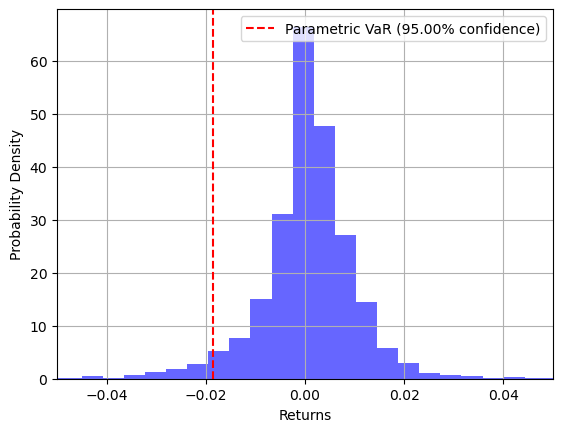

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

returns.hist(bins=50, density=True ,color='blue', alpha=0.6)

plt.xlabel('Returns')
plt.ylabel('Probability Density')
plt.axvline(x=var_parametric, linestyle='--', color='r', label='Parametric VaR (95.00% confidence)')
plt.legend()
plt.xlim(-0.05, 0.05)